<a href="https://colab.research.google.com/github/SoYeoni621/mulcam/blob/master/0302_Wed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [1]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/통계기반자연어처리/news.csv")

In [2]:
df = df.dropna()

In [3]:
df['tokens'] = df['ngrams'].apply(lambda x : " ".join([w.split('/')[0] for w in x.split(",")]))
token_list = df['tokens'].tolist()

In [6]:
len(token_list)

261802

In [7]:
token_list[:2]

['만기 국채 수익률 fed fed 금리 인상 지속 따르 인플레이션 압력 완화 어렵 전망 인플레이션 제어 반면 만기 국채 수익률 fed 지속 금리 인상 수준 상승 예측 단기 국채 수익률 상승 나타나 반면 장기 국채 수익률 상승 제한 일드커브 플래트닝 가속 덧붙이 고용창출 호조 수입 증가 견인 고용시장 호전 소비자 지출 떠받치 단기 국채 일드커브 인플레이션 fed 고용창출 고용시장 수입 완화',
 '만기 국채 가격 최악 보내 만기 국채 수익률 수준 거래 마감 뉴욕 fed fed 금리 인상 했으나 인플레이션 제어 예상 만기 국채 수익률 소폭 수준 만기 국채 가격 fed 금리 인상 지속 최악 보내 덧붙이 fed 점진적 금리 인상 단행 fed 금리 인상 고용시장 동향 예의 주시 반면 고용창출 건수 호전 fed 공격적 금리 인상 정책 지속 가능성 강조 만기 국채 가격 포인트 오르 가격 움직이 수익률 떨어 만기 국채 수익률 기록 했었 만기 국채 가격 수익률 국채 인상']

In [4]:
total_token_ls = [tokens.split() for tokens in token_list]

In [5]:
del df

In [6]:
del token_list

In [9]:
!pip install glove-python-binary

     |████████████████████████████████| 948 kB 11.1 MB/s 


# Glove

In [10]:
from glove import Corpus, Glove

corpus = Corpus()
# 말뭉치에서 동시 등장 행렬, 사전 만들기
corpus.fit(total_token_ls[:1000], window=5)

glove = Glove(no_components=100, learning_rate=0.05)
# corpus.matrix - 동시 등장 행렬
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [11]:
glove.most_similar("금리")

[('장단기', 0.9231854335426543),
 ('동결', 0.8985060270745877),
 ('부작용', 0.8937079498383667),
 ('더이상', 0.8881512459282781)]

In [12]:
glove.most_similar("인플레이션")

[('억제', 0.8989591789423227),
 ('제어', 0.8599113525956819),
 ('강화', 0.826238012588527),
 ('관측', 0.7949945777957133)]

# Fast Text

In [7]:
from gensim.models import FastText
model = FastText(total_token_ls[:1000], size=100, window=4, min_count=2, sg=1, iter=100, min_n=3, max_n=6)

In [8]:
model.wv.most_similar("금리")

[('맞췄으며', 0.6424842476844788),
 ('인하', 0.5950344800949097),
 ('정책수단', 0.5587774515151978),
 ('접근방법', 0.5508344769477844),
 ('초읽기', 0.5483018159866333),
 ('역작용', 0.5480170249938965),
 ('점쳐진다', 0.5463024377822876),
 ('인상', 0.5451970100402832),
 ('좁혀진', 0.537918210029602),
 ('밝힐', 0.5294908881187439)]

In [9]:
model.wv.most_similar("인플레이션")

[('fed', 0.61116623878479),
 ('제어', 0.5884134769439697),
 ('억제', 0.5842974185943604),
 ('대학', 0.5838243961334229),
 ('접근방법', 0.580815851688385),
 ('정책위원회', 0.5701059103012085),
 ('위로', 0.564884603023529),
 ('완전고용', 0.5541700124740601),
 ('물가', 0.5503969788551331),
 ('인상', 0.5501145720481873)]

# 합성곱(CNN)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
image = tf.constant([[[[1], [2], [3]], [[4], [5], [6]], [[7], [8], [9]]]], dtype=np.float32)

In [4]:
image.shape

TensorShape([1, 3, 3, 1])

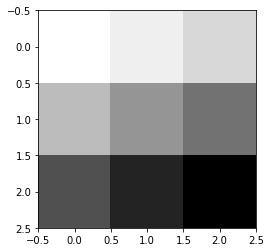

In [5]:
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')
plt.show()

In [8]:
weight = np.array([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])

In [9]:
weight.shape

(2, 2, 1, 1)

In [10]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
conv2d.shape

TensorShape([1, 2, 2, 1])

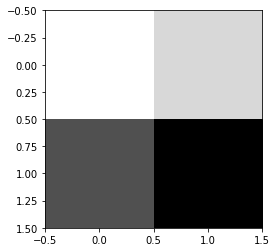

In [11]:
plt.imshow(conv2d.numpy().reshape(2,2), cmap='Greys')
plt.show()

In [12]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
conv2d.shape

TensorShape([1, 3, 3, 1])

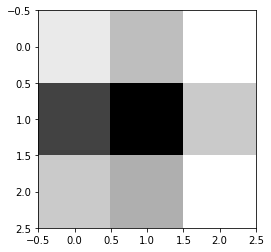

In [13]:
plt.imshow(conv2d.numpy().reshape(3,3), cmap='Greys')
plt.show()

In [14]:
weight = np.array([[[[1., 10, -1]], [[1., 10, -1]]], [[[1., 10, -1]], [[1., 10, -1]]]])
weight.shape

(2, 2, 1, 3)

In [16]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
conv2d.shape

TensorShape([1, 3, 3, 3])

feature_maps shape :  (3, 3, 3, 1)


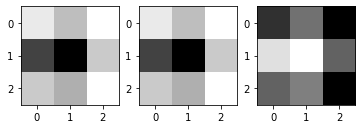

In [17]:
feature_maps = np.swapaxes(conv2d, 0, 3)
print("feature_maps shape : ", feature_maps.shape)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1, 3, i+1)
    plt.imshow(feature_map.reshape(3,3), cmap='Greys')

plt.show()

In [18]:
image = tf.constant([[[[4], [3]], [[2], [1]]]], dtype=np.float32)
image.shape

TensorShape([1, 2, 2, 1])

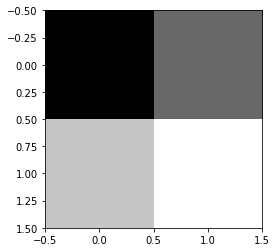

In [19]:
plt.imshow(image.numpy().reshape(2,2), cmap='Greys')
plt.show()

In [20]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, padding='valid')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


In [21]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
train_images = train_images/255
test_images = test_images/255

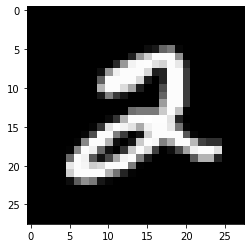

In [24]:
img = train_images[5]
plt.imshow(img, cmap='gray')

In [25]:
img = img.reshape(-1, 28, 28, 1)
img = tf.convert_to_tensor(img)

In [26]:
weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), strides=(2,2), padding='same', kernel_initializer=weight_init)(img)

In [27]:
conv2d.shape

TensorShape([1, 14, 14, 5])

In [29]:
def display(conv2d, n, w, h):
    feature_maps = np.swapaxes(conv2d, 0, 3)
    for i, feature_map in enumerate(feature_maps):
        plt.subplot(1, n, i + 1)
        plt.imshow(feature_map.reshape(w, h), cmap='Greys')
    plt.show()

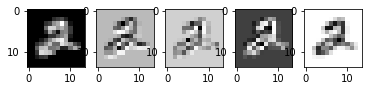

In [30]:
display(conv2d, 5, 14, 14)

In [31]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv2d)
pool.shape

TensorShape([1, 7, 7, 5])

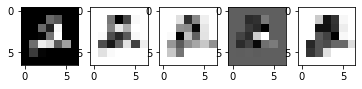

In [32]:
display(pool, 5, 7, 7)

In [1]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

train_images = train_images/255.
test_images = test_images/255.

valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.15, shuffle=True)

11501568/11490434 [==============================] - 0s 0us/step


In [34]:
print("train_images.shape : ", train_images.shape)
print("valid_images.shape : ", valid_images.shape)
print("test_images.shape : ", test_images.shape)

train_images.shape :  (60000, 28, 28, 1)
valid_images.shape :  (8500, 28, 28, 1)
test_images.shape :  (1500, 28, 28, 1)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 320 = 32(필터의 개수) * 9(3, 3) + 32(bias 개수)
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) # 18496 = 32(입력의 개수) * 64(필터의 개수) * 3 * 3 + 64(bias)
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) # 36928 = 64 * 64 * 9 + 64

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(32, (3, 3), activation=tf.nn.relu)(inputs)
pool1 = MaxPool2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation=tf.nn.relu)(pool1)
pool2 = MaxPool2D((2, 2))(conv2)

conv3 = Conv2D(64, (3, 3), activation=tf.nn.relu)(pool2)
flat = Flatten()(conv3)

dense4 = Dense(64, activation='relu')(flat)
outputs = Dense(10, activation='softmax')(dense4)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 64)          3692

In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_images, train_labels,
                 validation_data=(valid_images, valid_labels),
                 epochs=100, batch_size=200)

Epoch 1/100
300/300 [==============================] - 15s 17ms/step - loss: 0.3257 - accuracy: 0.9029 - val_loss: 0.0880 - val_accuracy: 0.9721
Epoch 2/100
300/300 [==============================] - 4s 14ms/step - loss: 0.0725 - accuracy: 0.9778 - val_loss: 0.0484 - val_accuracy: 0.9846
Epoch 3/100
300/300 [==============================] - 4s 14ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.0349 - val_accuracy: 0.9878
Epoch 4/100
300/300 [==============================] - 4s 14ms/step - loss: 0.0376 - accuracy: 0.9881 - val_loss: 0.0338 - val_accuracy: 0.9893
Epoch 5/100
300/300 [==============================] - 4s 14ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0329 - val_accuracy: 0.9894
Epoch 6/100
300/300 [==============================] - 4s 14ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0278 - val_accuracy: 0.9905
Epoch 7/100
300/300 [==============================] - 4s 14ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0272 - val_accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'upper roght'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


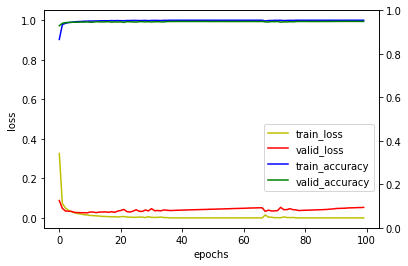

In [5]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='valid_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

loss_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
loss_ax.plot(hist.history['val_accuracy'], 'g', label='valid_accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper roght', bbox_to_anchor=(1, 0.5))

plt.show()